# In this analysis, I want to find out what makes the employee to left the company
__Source from Kaggle__

## About this table


In [150]:
## Emp_Id                = Id of Employee
## satisfaction_level    = Satisfaction level of employee in percentage. 100% or 1 is very satisfied. 0% or 0 is not satisfied
## last_evaluation       = Time from last evaluation in years
## number_project        = Number of projects an employee is working on
## average_monthly_hours = Average hours worked by employee in last 3 months
## time_spend_company    = Time spend my employee commuting to office
## Work_accident         = If the employee was involved in a work accident
## left                  = If the employee has left the company
## promotion_last_5years = If the employee has a promotion in past 5 years
## Department            = Department employee is working in
## salary                = monthly wages

__Importing library & read files from my drive__

In [151]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [152]:
data = (r"C:\Users\user\Desktop\Kaggle\HR_Employee_Data.xlsx")
df = pd.read_excel(data)

In [153]:
df.head()

,Emp_Id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,IND02438,0.38,0.53,2,157,3,0,1,0,sales,low
1,IND28133,0.80,0.86,5,262,6,0,1,0,sales,medium
2,IND07164,0.11,0.88,7,272,4,0,1,0,sales,medium
3,IND30478,0.72,0.87,5,223,5,0,1,0,sales,low
4,IND24003,0.37,0.52,2,159,3,0,1,0,sales,low


__Data cleaning process here__

In [154]:
## Since the Emp_Id is not necessarily for the analysis, I will proceed to drop the columns
## And for the average_month_hours I will convert it from hours to days

df.drop(columns = ["Emp_Id"], inplace = True)
df = df.rename(columns = {"average_montly_hours" :"average_monthly_hours"})

Change from minutes to hours for better understanding

In [155]:
def hour(df):
    if df["average_monthly_hours"] > 0:
        return (df["average_monthly_hours"] / 24)
    else:
        return df["average_monthly_hours"]

In [156]:
## Apply the formula above to convert into 
df["average_monthly_hours"] = df.apply(hour, axis = 1)

## The float substraction will give more than 2 decimal, so I will apply lambda to limit it in 2 decimal
df["average_monthly_hours"] = df["average_monthly_hours"].apply(lambda x: float("{:.1f}".format(x)))

__Rename some columns to snake case__

In [157]:
df.rename(columns = {"average_monthly_hours": "Average_Monthly_Days","satisfaction_level": "Satisfaction_Level",
                    "last_evaluation": "Last_Evaluation", "number_project": "Number_of_Project", "time_spend_company":
                    "Time_Spend_Company", "Work_accident": "Work_Accident", "left": "Left", "promotion_last_5years":
                    "Promotion_Last_5years", "salary": "Salary"}, inplace = True)
df.head()

,Satisfaction_Level,Last_Evaluation,Number_of_Project,Average_Monthly_Days,Time_Spend_Company,Work_Accident,Left,Promotion_Last_5years,Department,Salary
0,0.38,0.53,2,6.5,3,0,1,0,sales,low
1,0.80,0.86,5,10.9,6,0,1,0,sales,medium
2,0.11,0.88,7,11.3,4,0,1,0,sales,medium
3,0.72,0.87,5,9.3,5,0,1,0,sales,low
4,0.37,0.52,2,6.6,3,0,1,0,sales,low


__Replace low, medium, high in Salary to 0, 1, 2__
This is for data exploratory later on

In [158]:
df["Salary"].replace({"low": 0, "medium":1, "high":2}, inplace = True)

In [159]:
df.head()

,Satisfaction_Level,Last_Evaluation,Number_of_Project,Average_Monthly_Days,Time_Spend_Company,Work_Accident,Left,Promotion_Last_5years,Department,Salary
0,0.38,0.53,2,6.5,3,0,1,0,sales,0
1,0.80,0.86,5,10.9,6,0,1,0,sales,1
2,0.11,0.88,7,11.3,4,0,1,0,sales,1
3,0.72,0.87,5,9.3,5,0,1,0,sales,0
4,0.37,0.52,2,6.6,3,0,1,0,sales,0


# Data Visualization
__Before continue any analysis, I wish to have a simple view of the relationships of few columns with ["Left"]__

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


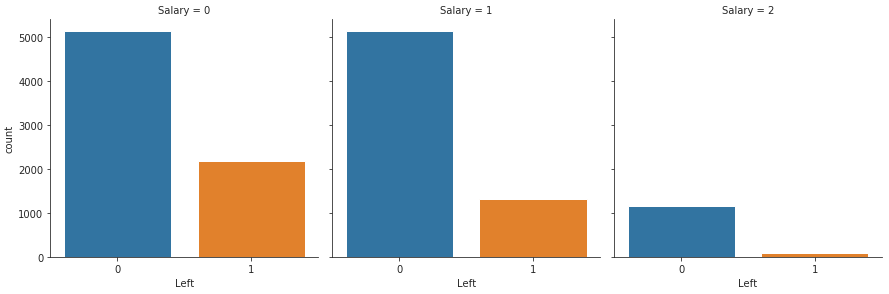

In [160]:
with sns.axes_style(style = "ticks"):
    g = sns.catplot("Left", col = "Salary", col_wrap = 6, data = df, kind = "count", height = 4, aspect = 1)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


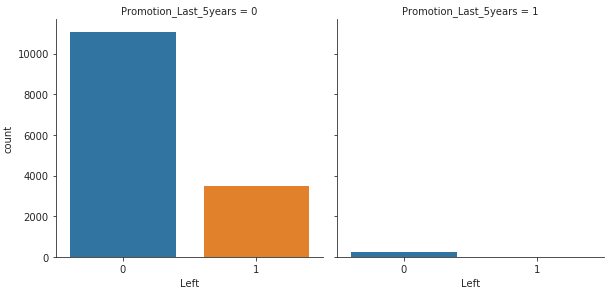

In [183]:
with sns.axes_style(style = "ticks"):
    g = sns.catplot("Left", col = "Promotion_Last_5years", col_wrap = 6, data = df, kind = "count", height = 4, aspect = 1)

Employee whos had a promotion in the last 5 years never left the company in this dataset
## __See if the satisfaction level has drop since last evaluation__

In [190]:
print("Current Satisfaction Level: {:.2f}".format(df["Satisfaction_Level"].mean()))
print("Last Evaluation: {:.2f}".format(df["Last_Evaluation"].mean()))

Current Satisfaction Level: 0.61
Last Evaluation: 0.72


Company need to do something to retain their existing employees by increasing their satisfaction level

__Check the satisfaction level of the employee who left and did not left the company__

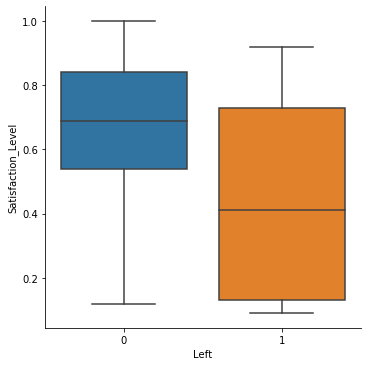

In [199]:
sns.catplot(x="Left", y="Satisfaction_Level", kind = "box", data=df)

There is enough evidence to conclude that satisfaction level can affect the employees whether stay or not

In [165]:
print("Mean satisfaction level of employees that has left {:.2f}".format(df_left["Satisfaction_Level"].mean()))
print("Mean satisfaction level of employees that stay {:.2f}".format(df_stay["Satisfaction_Level"].mean()))

Mean satisfaction level of employees that has left 0.44
Mean satisfaction level of employees that stay 0.67


# Data Exploratory
__Do some basic Machine Learning with Multiple Linear Regression__

In [194]:
## Splitting in training and testing set 

msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

from sklearn import linear_model
regr = linear_model.LinearRegression()

x = np.asanyarray(train[["Number_of_Project", "Average_Monthly_Days", "Time_Spend_Company", "Work_Accident", 
                         "Promotion_Last_5years", "Salary"]])
y =np.asanyarray(train[["Left"]])
regr.fit(x, y)

print("Coefficient:", regr.coef_)

Coefficient: [[-0.01407733  0.0126055   0.04360125 -0.17908499 -0.14908304 -0.100758  ]]


__Basic view of this results__
- The **Average Monthly Days Worked** in the past 3 months and **Time Spend Commuting to Company** seem encouraging employees to left
- In the analysis above, employees who leave the company has a lower satisfaction level mean compare to employee who stay
- This analysis can conclude that the satisfaction level is a crucial things in retaining existing employees
- In order the company to do so, company should have a __reduced average monthly working days and time spend commuting to company__ 
- Introducing more hourly shifts system might reduce the working hours
- Providing transport to employees might bring convinience to the employees(Provide shuttle bus at higher density employee's residence area)